In [ ]:
from ISLP import load_data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [171]:

college = load_data('College')
# print(college.head())
college.isnull().sum()
# college.drop(college[college.values=='?'].index, axis=0, inplace=True)

# college.columns
# college.describe()
# college= pd.read_csv('/Users/asthagupta/Downloads/College.csv')
# college.head()
# college.set_index('Unnamed: 0', inplace=True)

# college.index.name = 'College_name'
# college.head()

# # college.columns
# college.describe()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [ ]:
columns = [ college['Top10perc'], college['Apps'], college['Enroll']]

for i in columns:
    for j in columns:
        
        plt.scatter(i,j)
        plt.xlabel(i.name)
        plt.ylabel(j.name)
plt.show()
columns = [ 'Top10perc', 'Apps', 'Enroll']
pd.plotting.scatter_matrix(college[columns], figsize=(10,10), alpha=0.5)
plt.show()

In [ ]:
print(college['Private'].unique())  # Check unique values
print(college['Private'].value_counts())  # Check value counts


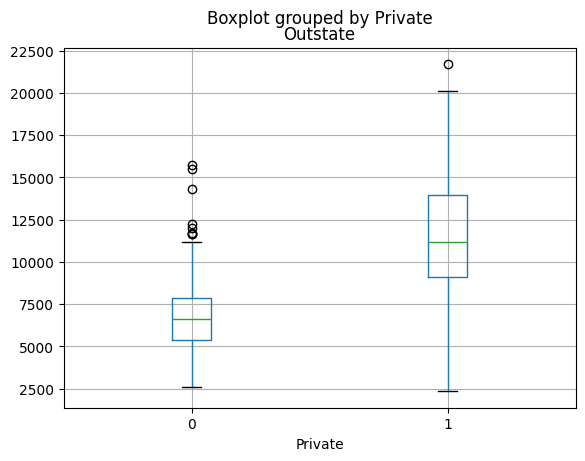

In [154]:
# # First, let's see the exact values including spaces
# print(college['Private'].unique())

# # Now let's map correctly without extra spaces
# college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
# print(college.head())

# fig, ax = plt.subplots(figsize=(10,10), nrows=1, ncols=2)
# ax[0].boxplot(college['Outstate'])
# plt.show()
# ax[1].boxplot(college['Private'])
# plt.show()
college.boxplot(column='Outstate', by='Private')
plt.show()
# plt.boxplot(college['Outstate'], college['Private'])
# plt.show()


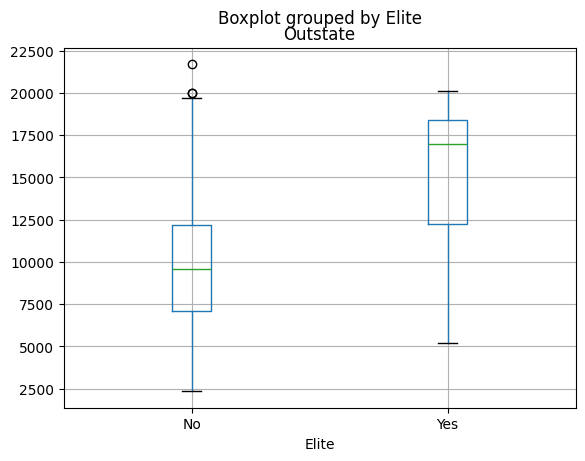

Max Top10perc: 96


In [161]:
college['Elite'] = pd.cut(college['Top10perc'],[0 ,50 ,max(college['Top10perc'])],labels =['No', 'Yes'])
college['Elite'].value_counts()
college.boxplot(column='Outstate', by='Elite')
plt.show()
max(college['Top10perc'])
print("Max Top10perc:", max(college['Top10perc']))

In [ ]:
auto=load_data('Auto')
# print(auto.head())
missing_values = auto.isnull().sum()
# print(missing_values)
# print(auto.describe().min())
auto.describe()
auto.shape


pd.plotting.scatter_matrix(auto, figsize=(10,10))
print(auto.corr())

In [ ]:
auto=pd.read_csv('/Users/asthagupta/Downloads/Auto.csv')
auto= auto.drop(range(10,85), axis=0)
auto.shape

In [141]:
boston = pd.read_csv('/Users/asthagupta/Downloads/ALL CSV FILES - 2nd Edition/Boston.csv')
boston.head()
boston.describe()
boston.corr()
boston['chas'].value_counts()
np.median(boston['ptratio'])

19.05

In [150]:
print(boston.loc[boston['medv'].idxmin()])
np.sum(boston['rm']>=7)
boston.loc[boston['rm']>=8]

Unnamed: 0    399.0000
crim           38.3518
zn              0.0000
indus          18.1000
chas            0.0000
nox             0.6930
rm              5.4530
age           100.0000
dis             1.4896
rad            24.0000
tax           666.0000
ptratio        20.2000
lstat          30.5900
medv            5.0000
Name: 398, dtype: float64


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
